<a href="https://colab.research.google.com/github/scherbatsky-jr/Toxic-Comment-Classifier/blob/master/Toxic_Comment_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing.text import Tokenizer
from keras import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_path ="/content/gdrive/My Drive/MLStuffs/CommentsClassifier"
training_data_path= data_path+"/train.csv"
training_data= pd.read_csv(training_data_path)

test_data_path= data_path+"/test.csv"
testlabels_data_path = data_path+"/test_labels.csv"
test_data= pd.read_csv(test_data_path)
test_labels= pd.read_csv(testlabels_data_path)


In [4]:
training_data[5000:5005]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5000,0d3c921d9fb4b60c,hay bitch \n\nthank you kindly for your advice...,1,0,1,0,1,0
5001,0d3d7176080af3f2,"""\n\n potential resource \n\n Mexico's other c...",0,0,0,0,0,0
5002,0d3fe36dfe5a16af,"""\n\nPlease note that warnings are sanctioned ...",0,0,0,0,0,0
5003,0d3fec1ba3c85535,"""\n\nUnless the admin of [stadiumarcadium.com]...",0,0,0,0,0,0
5004,0d409152e69a934d,"""\n\n In response to your threat on my user pa...",0,0,0,0,0,0


<h2>Stemming all the text from Snowball Stemmer</h2>

In [5]:
sentence_list = [sentence for sentence in training_data.comment_text]
lowered_sentence_list = [sentence.lower() for sentence in sentence_list]
print(lowered_sentence_list[1])
word_list = [sentence.split() for sentence in lowered_sentence_list]


testsentence_list = [sentence for sentence in test_data.comment_text]
testlowered_sentence_list = [sentence.lower() for sentence in testsentence_list]
print(testlowered_sentence_list[1])
testword_list = [sentence.split() for sentence in testlowered_sentence_list]
print(testword_list[0:200])

print(len(word_list))
all_sentence_list = word_list + testword_list
print(len(all_sentence_list))

d'aww! he matches this background colour i'm seemingly stuck with. thanks.  (talk) 21:51, january 11, 2016 (utc)
== from rfc == 

 the title is fine as it is, imo.
[['yo', 'bitch', 'ja', 'rule', 'is', 'more', 'succesful', 'then', "you'll", 'ever', 'be', 'whats', 'up', 'with', 'you', 'and', 'hating', 'you', 'sad', 'mofuckas...i', 'should', 'bitch', 'slap', 'ur', 'pethedic', 'white', 'faces', 'and', 'get', 'you', 'to', 'kiss', 'my', 'ass', 'you', 'guys', 'sicken', 'me.', 'ja', 'rule', 'is', 'about', 'pride', 'in', 'da', 'music', 'man.', 'dont', 'diss', 'that', 'shit', 'on', 'him.', 'and', 'nothin', 'is', 'wrong', 'bein', 'like', 'tupac', 'he', 'was', 'a', 'brother', 'too...fuckin', 'white', 'boys', 'get', 'things', 'right', 'next', 'time.,'], ['==', 'from', 'rfc', '==', 'the', 'title', 'is', 'fine', 'as', 'it', 'is,', 'imo.'], ['"', '==', 'sources', '==', '*', 'zawe', 'ashton', 'on', 'lapland', '—', '/', '"'], [':if', 'you', 'have', 'a', 'look', 'back', 'at', 'the', 'source,', 'the', 'in

In [0]:
import string
for w in all_sentence_list:
  for i in range(0,len(w)):
    w[i] = w[i].translate(str.maketrans('','',string.punctuation))

In [0]:
stemmer = SnowballStemmer("english")

stemmed_sentence = [[stemmer.stem(word) for word in sentence] for sentence in all_sentence_list]

In [8]:
print("Sentence before stemming: ",all_sentence_list[3])
print("Sentence after stemming: ",stemmed_sentence[3])

Sentence before stemming:  ['', 'more', 'i', 'cant', 'make', 'any', 'real', 'suggestions', 'on', 'improvement', '', 'i', 'wondered', 'if', 'the', 'section', 'statistics', 'should', 'be', 'later', 'on', 'or', 'a', 'subsection', 'of', 'types', 'of', 'accidents', 'i', 'think', 'the', 'references', 'may', 'need', 'tidying', 'so', 'that', 'they', 'are', 'all', 'in', 'the', 'exact', 'same', 'format', 'ie', 'date', 'format', 'etc', 'i', 'can', 'do', 'that', 'later', 'on', 'if', 'noone', 'else', 'does', 'first', '', 'if', 'you', 'have', 'any', 'preferences', 'for', 'formatting', 'style', 'on', 'references', 'or', 'want', 'to', 'do', 'it', 'yourself', 'please', 'let', 'me', 'know', 'there', 'appears', 'to', 'be', 'a', 'backlog', 'on', 'articles', 'for', 'review', 'so', 'i', 'guess', 'there', 'may', 'be', 'a', 'delay', 'until', 'a', 'reviewer', 'turns', 'up', 'its', 'listed', 'in', 'the', 'relevant', 'form', 'eg', 'wikipediagoodarticlenominationstransport', '']
Sentence after stemming:  ['', 'mo

<h2>Tokenizing</h2>

In [0]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(stemmed_sentence)

X_train = tokenizer.texts_to_sequences(stemmed_sentence[0:290000])
X_test = tokenizer.texts_to_sequences(stemmed_sentence[290000:])
vocab_size = len(tokenizer.word_index) + 1

In [13]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 1411
X_train = pad_sequences(X_train, padding = 'post',maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post',maxlen = maxlen)
X_train.shape



(290000, 1411)

In [14]:
print("Sentence before tokenization: " ,stemmed_sentence[3])
print("Sentence after tokenization: ",X_train[3])
X_train = np.flip(X_train,0)

Sentence before tokenization:  ['', 'more', 'i', 'cant', 'make', 'ani', 'real', 'suggest', 'on', 'improv', '', 'i', 'wonder', 'if', 'the', 'section', 'statist', 'should', 'be', 'later', 'on', 'or', 'a', 'subsect', 'of', 'type', 'of', 'accid', 'i', 'think', 'the', 'refer', 'may', 'need', 'tidi', 'so', 'that', 'they', 'are', 'all', 'in', 'the', 'exact', 'same', 'format', 'ie', 'date', 'format', 'etc', 'i', 'can', 'do', 'that', 'later', 'on', 'if', 'noon', 'els', 'doe', 'first', '', 'if', 'you', 'have', 'ani', 'prefer', 'for', 'format', 'style', 'on', 'refer', 'or', 'want', 'to', 'do', 'it', 'yourself', 'pleas', 'let', 'me', 'know', 'there', 'appear', 'to', 'be', 'a', 'backlog', 'on', 'articl', 'for', 'review', 'so', 'i', 'guess', 'there', 'may', 'be', 'a', 'delay', 'until', 'a', 'review', 'turn', 'up', 'it', 'list', 'in', 'the', 'relev', 'form', 'eg', 'wikipediagoodarticlenominationstransport', '']
Sentence after tokenization:  [ 3 66  8 ...  0  0  0]


<h2> Maintaining labels</h2>

In [15]:
Y_train = []
for data in training_data.itertuples():
  label_set = []
  label_set.append(data.toxic)
  label_set.append(data.severe_toxic)
  label_set.append(data.obscene)
  label_set.append(data.threat)
  label_set.append(data.insult)
  label_set.append(data.identity_hate)
  Y_train.append(label_set)
  
y_train = np.array(Y_train)
y_train.shape  

(159571, 6)

In [16]:
test_labels2 = []
for data in test_labels.itertuples():
  label_set = []
  label_set.append(data.toxic)
  label_set.append(data.severe_toxic)
  label_set.append(data.obscene)
  label_set.append(data.threat)
  label_set.append(data.insult)
  label_set.append(data.identity_hate)
  test_labels2.append(label_set)
  
for w in test_labels2:
  for i in range(6):
    if w[i] == -1:
      w[i] = 1
      
test_label = np.array(test_labels2)

test_label.shape

(153164, 6)

In [17]:
print(len(Y_train))
rem = 290000 - 159571
maxl = 290000
count = 0
while len(Y_train) <maxl:
  Y_train.append(test_labels2[count])
  count = count + 1
  
test_labels2 = test_labels2[rem:]
print(len(Y_train))

159571
290000


In [18]:
label_count = [0,0,0,0,0,0]
for y in Y_train:
  for i in range(6):
    if y[i] == 1:
      label_count[i] = label_count[i] + 1
      
print(label_count)



[96336, 77727, 87433, 76472, 86620, 77828]


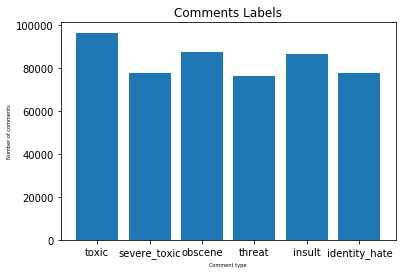

In [19]:
label = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
import matplotlib.pyplot as plt

plt.bar(label,label_count)
plt.xlabel("Comment type",fontsize = 5)
plt.ylabel("Number of comments",fontsize = 5)
plt.title("Comments Labels")
plt.show()

In [20]:
y_train = np.array(Y_train)
test_label = np.array(test_labels2)
y_train.shape


(290000, 6)

In [0]:
y_train = np.flip(y_train,0)

<h2>Building a Keras Sequential Model</h2>

In [22]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

W0616 05:24:42.139405 140300413638528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 05:24:42.176341 140300413638528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 05:24:42.184803 140300413638528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 05:24:42.257115 140300413638528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 05:24:42.276452 140300413638528 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1411, 100)         41091100  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1407, 128)         64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 41,156,584
Trainable params: 41,156,584
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train,
                    y_train,
                    epochs=10
                   )

W0616 05:24:46.428565 140300413638528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
290000/290000 [==============================] - 350s 1ms/step - loss: 0.5109 - acc: 0.7579
Epoch 2/10
290000/290000 [==============================] - 343s 1ms/step - loss: 0.4805 - acc: 0.7714
Epoch 3/10
290000/290000 [==============================] - 343s 1ms/step - loss: 0.4446 - acc: 0.7892
Epoch 4/10
290000/290000 [==============================] - 343s 1ms/step - loss: 0.3914 - acc: 0.8161
Epoch 5/10
290000/290000 [==============================] - 343s 1ms/step - loss: 0.3309 - acc: 0.8464
Epoch 6/10
290000/290000 [==============================] - 343s 1ms/step - loss: 0.2762 - acc: 0.8717
Epoch 7/10
290000/290000 [==============================] - 343s 1ms/step - loss: 0.2338 - acc: 0.8919
Epoch 8/10
290000/290000 [==============================] - 342s 1ms/step - loss: 0.2037 - acc: 0.9061
Epoch 9/10
290000/290000 [==============================] - 342s 1ms/step - loss: 0.1817 - acc: 0.9165
Epoch 10/10
290000/290000 [==============================] - 344s 1ms/ste

In [25]:
results = model.evaluate(X_test,test_label)
print("Test results: ", results)

22735/22735 [==============================] - 2s 93us/step
Test results:  [2.0865192184192365, 0.5147056659250593]


<h2>Sample Testing</h2>

In [0]:

sample = "you are a stupid person you don't know how to write anything you should just die and free world from your presence your artice is the worst piece of writing I have ever seen"
sample_sentence = sample.split()
stemmed_sample = [stemmer.stem(word) for word in sample_sentence]
tokenizer.fit_on_texts(stemmed_sample)
final_sample =tokenizer.texts_to_sequences(stemmed_sample)
final_sample =  pad_sequences(final_sample, padding = 'post',maxlen = maxlen)
prob = model.predict(final_sample)


In [30]:
top3 = np.argsort(prob[0])
print("The top three predictions are:")
for i in range(3):
  print(label[i])

The top three predictions are:
toxic
severe_toxic
obscene


<h2> Proposed Grid Search</h2>

In [0]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(6, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [0]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[5],
                  vocab_size=[10000], 
                  embedding_dim=[100],
                  maxlen=[1411])


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=create_model,
                            epochs=10, batch_size=100,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, n_iter=5)

grid_result = grid.fit(X_train, y_train)

In [0]:
test_accuracy = grid.score(X_test, y_test)